## Generate random graph

Erd&#246;s-R&#233;nyi random graph algorithm

1. Fix the number of nodes $N$ and probability $p$ ($0 < p < 1$)).
2. Add an edge for each pair of nodes, with the given probability. Here the number of pairs is $N(N-1)/2$. 

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## Implemented function in networkx

Graph with 100 nodes and 241 edges


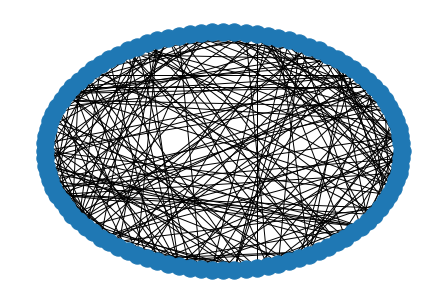

In [13]:
n = 100
p = 0.05

G_ER_networkx = nx.erdos_renyi_graph(n, p)
pos = nx.circular_layout(G_ER_networkx)

print(nx.info(G_ER_networkx))

nx.draw(G_ER_networkx, pos)
plt.show()

## Self-coding

Graph with 100 nodes and 260 edges


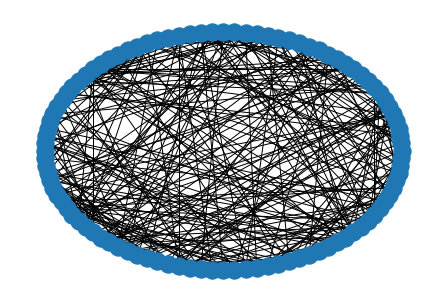

In [14]:
def gen_ER_network(n, p, seed=None):

    if seed is not None:
        np.random.seed(seed=seed)

    # Add nodes to an empty graph
    G = nx.Graph()
    G.add_nodes_from(list(range(n)))

    edges = []
    
    for ind in range(n):
        for jnd in range(ind+1, n):
            if np.random.rand() < p: 
                edges.append((ind, jnd))

    G.add_edges_from(edges)

    return G

n = 100
p = 0.05

G_ER_self = gen_ER_network(n, p)
pos = nx.circular_layout(G_ER_self)

print(nx.info(G_ER_self))

nx.draw(G_ER_self, pos)
plt.show()

## Maximum cluster size

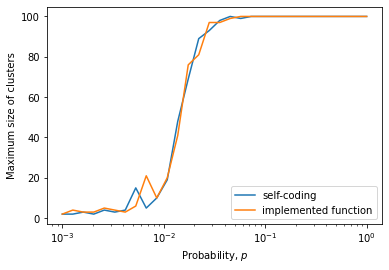

In [15]:
def calc_size_of_GC(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    return len(G0)

p = np.logspace(-3, 0, 30)

Cluster_Size1 = []
Cluster_Size2 = []

n = 100

for pval in p:
    G1 = gen_ER_network(n, pval)
    Cluster_Size1.append(calc_size_of_GC(G1))
    G2 = nx.erdos_renyi_graph(n, pval)
    Cluster_Size2.append(calc_size_of_GC(G2))


plt.plot(p, Cluster_Size1, label='self-coding')
plt.plot(p, Cluster_Size2, label='implemented function')
plt.xlabel('Probability, $p$')
plt.ylabel('Maximum size of clusters')
plt.xscale('log')
plt.legend()
plt.show()